'Reject H0 (Significant Difference)' means there is a statistically significant difference between the regional and overall means.

'Fail to Reject H0 (No Significant Difference)' means the regional mean is not statistically different from the overall mean at the 5% significance level.

In [24]:
import pandas as pd

# Load your data
df = pd.read_excel('42_Cases_under_crime_against_women (1).xlsx')

# ------- FEATURE ENGINEERING -------

# Conviction Rate (Convicted / Reported)
df['Conviction_Rate'] = df['Cases_Convicted'] / df['Cases_Reported']

# Chargesheet Rate (Chargesheeted / Reported)
df['Chargesheet_Rate'] = df['chargesheet_police_work'] / df['Cases_Reported']

# Acquittal Rate (Acquitted / Sent for Trial)
#df['Acquittal_Rate'] = df['Cases_Acquitted_or_Discharged'] / df['Cases_Sent_for_Trial']

# Withdrawal Rate (Withdrawn by Govt / Reported)
df['Withdrawal_Rate'] = df['Cases_Withdrawn_by_the_Govt'] / df['Cases_Reported']

# Investigation Backlog Rate (Pending Investigation at Year End / Reported)
df['Investigation_Backlog_Rate'] = df['Cases_Pending_Investigation_at_Year_End'] / df['Cases_Reported']

# Trial Backlog Rate (Pending Trial at Year End / Sent for Trial)
df['Trial_Backlog_Rate'] = df['Cases_Pending_Trial_at_Year_End'] / df['Cases_Sent_for_Trial']

# False Case Rate
df['False_Case_Rate'] = df['Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law'] / df['Cases_Reported']

# Composite Severity Score (example)
df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))

# Annual Change for each AreaName/Crime Type
df.sort_values(['Area_Name', 'Group_Name', 'Year'], inplace=True)
df['Annual_Case_Change'] = df.groupby(['Area_Name', 'Group_Name'])['Cases_Reported'].pct_change()

# ---- (Optional) Save or preview the new features ----
#df.to_excel('feature_engineering_output.xlsx', index=False)

df.sort_values(['Area_Name', 'Group_Name', 'Year'], inplace=True)
df['Annual_Case_Change'] = df.groupby(['Area_Name', 'Group_Name'])['Cases_Reported'].pct_change()


rates_table = df[['Area_Name', 'Group_Name', 'Year',
    'Conviction_Rate', 'Chargesheet_Rate', 'Withdrawal_Rate',
    'Investigation_Backlog_Rate', 'Trial_Backlog_Rate', 'False_Case_Rate',
    'Severity_Score', 'Annual_Case_Change']]
rates_table.to_excel('rates_table_output.xlsx', index=False)

# Preview (first 10 rows):
rates_table.head(5)

,Area_Name,Group_Name,Year,Conviction_Rate,Chargesheet_Rate,Withdrawal_Rate,Investigation_Backlog_Rate,Trial_Backlog_Rate,False_Case_Rate,Severity_Score,Annual_Case_Change
1750,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,2001,0.0,0.555556,0.0,0.444444,2.000000,0.0,1.555556,NaN
1785,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,2002,0.0,0.750000,0.0,0.000000,3.333333,0.0,2.250000,-0.555556
1820,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,2003,0.0,0.428571,0.0,0.428571,3.666667,0.0,1.785714,0.750000
1855,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,2004,0.0,0.600000,0.0,0.600000,3.666667,0.0,2.100000,-0.285714
1890,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,2005,0.0,0.200000,0.0,0.800000,12.000000,0.0,2.200000,0.000000


In [26]:
import pandas as pd

# Load data
df = pd.read_excel('42_Cases_under_crime_against_women (1).xlsx')

# List of columns to smooth by adding 1
cols_to_smooth = [
    'Cases_Convicted',
    'Cases_Reported',
    'chargesheet_police_work',
    'Cases_Acquitted_or_Discharged',
    'Cases_Sent_for_Trial',
    'Cases_Withdrawn_by_the_Govt',
    'Cases_Pending_Investigation_at_Year_End',
    'Cases_Pending_Trial_at_Year_End',
    'Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law'
]

# Add 1 to every value in these columns
df[cols_to_smooth] = df[cols_to_smooth] + 1

# Save the smoothed data to a new Excel file
df.to_excel('smoothed_cases_data.xlsx', index=False)


In [28]:
import pandas as pd

# Load your data
df = pd.read_excel('smoothed_cases_data.xlsx')

# ------- FEATURE ENGINEERING -------

# Conviction Rate (Convicted / Reported)
df['Conviction_Rate'] = df['Cases_Convicted'] / df['Cases_Reported']

# Chargesheet Rate (Chargesheeted / Reported)
df['Chargesheet_Rate'] = df['chargesheet_police_work'] / df['Cases_Reported']

# Acquittal Rate (Acquitted / Sent for Trial)
#df['Acquittal_Rate'] = df['Cases_Acquitted_or_Discharged'] / df['Cases_Sent_for_Trial']

# Withdrawal Rate (Withdrawn by Govt / Reported)
df['Withdrawal_Rate'] = df['Cases_Withdrawn_by_the_Govt'] / df['Cases_Reported']

# Investigation Backlog Rate (Pending Investigation at Year End / Reported)
df['Investigation_Backlog_Rate'] = df['Cases_Pending_Investigation_at_Year_End'] / df['Cases_Reported']

# Trial Backlog Rate (Pending Trial at Year End / Sent for Trial)
df['Trial_Backlog_Rate'] = df['Cases_Pending_Trial_at_Year_End'] / df['Cases_Sent_for_Trial']

# False Case Rate
df['False_Case_Rate'] = df['Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law'] / df['Cases_Reported']

# Composite Severity Score (example)
df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))
# Annual Change for each AreaName/Crime Type
df.sort_values(['Area_Name', 'Group_Name', 'Year'], inplace=True)
df['Annual_Case_Change'] = df.groupby(['Area_Name', 'Group_Name'])['Cases_Reported'].pct_change()

# ---- (Optional) Save or preview the new features ----
#df.to_excel('feature_engineering_output.xlsx', index=False)

df.sort_values(['Area_Name', 'Group_Name', 'Year'], inplace=True)
df['Annual_Case_Change'] = df.groupby(['Area_Name', 'Group_Name'])['Cases_Reported'].pct_change()


rates_table = df[['Area_Name', 'Group_Name', 'Year',
    'Conviction_Rate', 'Chargesheet_Rate', 'Withdrawal_Rate',
    'Investigation_Backlog_Rate', 'Trial_Backlog_Rate', 'False_Case_Rate',
    'Severity_Score']]
rates_table.to_excel('rates_table_output.xlsx', index=False)

# Preview (first 10 rows):
rates_table.head(5)

,Area_Name,Group_Name,Year,Conviction_Rate,Chargesheet_Rate,Withdrawal_Rate,Investigation_Backlog_Rate,Trial_Backlog_Rate,False_Case_Rate,Severity_Score
1750,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,2001,0.100000,0.600000,0.100000,0.500000,1.833333,0.100000,1.520000
1785,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,2002,0.200000,0.800000,0.200000,0.200000,2.750000,0.200000,2.040000
1820,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,2003,0.125000,0.500000,0.125000,0.500000,3.000000,0.125000,1.712500
1855,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,2004,0.166667,0.666667,0.166667,0.666667,3.000000,0.166667,1.950000
1890,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,2005,0.166667,0.333333,0.166667,0.833333,6.500000,0.166667,2.033333


In [30]:
import pandas as pd

# Load the dataset
df = pd.read_excel('feature_engineering_output.xlsx')

df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))

# Region mapping dictionary (as previously provided)
region_mapping = {
    'Jammu & Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North',
    'Uttarakhand': 'North', 'Haryana': 'North', 'Delhi': 'North', 'Rajasthan': 'North',
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    'Andhra Pradesh': 'South', 'Karnataka': 'South', 'Kerala': 'South',
    'Tamil Nadu': 'South', 'Telangana': 'South',
    'Goa': 'West', 'Gujarat': 'West', 'Maharashtra': 'West',
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    'Assam': 'North-East', 'Arunachal Pradesh': 'North-East', 'Nagaland': 'North-East',
    'Manipur': 'North-East', 'Mizoram': 'North-East', 'Tripura': 'North-East',
    'Meghalaya': 'North-East', 'Sikkim': 'North-East',
    'Andaman & Nicobar Islands': 'Island', 'Dadra & Nagar Haveli': 'West',
    'Daman & Diu': 'West', 'Lakshadweep': 'Island', 'Puducherry': 'South',
    'Chandigarh': 'North'
}

# Map states to regions
df['Region'] = df['Area_Name'].map(region_mapping)

# Filter rows with regions (to avoid missing values)
df_region = df.dropna(subset=['Region'])

# List of rates to analyze
rates = ['Conviction_Rate', 'Chargesheet_Rate', 'Withdrawal_Rate',
         'Investigation_Backlog_Rate', 'Trial_Backlog_Rate', 'False_Case_Rate', 'Severity_Score']


# Aggregate rates by Region (mean)
regional_rates = df_region.groupby('Region')[rates].mean().reset_index()

# After processing
regional_rates.head()  # Confirm data is present
regional_rates.to_excel('rates_table_output.xlsx', index=False)  
# Display aggregated rates
regional_rates


,Region,Conviction_Rate,Chargesheet_Rate,Withdrawal_Rate,Investigation_Backlog_Rate,Trial_Backlog_Rate,False_Case_Rate,Severity_Score
0,Central,0.440730,0.851896,0.317854,0.341196,2.390575,0.304914,1.999372
1,East,0.257719,0.751258,0.229276,0.780994,3.753573,0.269931,2.352112
2,Island,0.733132,0.942378,0.698350,0.850188,2.598395,0.698350,1.859251
3,North,0.441161,0.746734,0.330603,0.511268,2.542721,0.404240,1.795691
4,North-East,0.656176,0.835751,0.565013,1.105902,2.692051,0.563045,1.644650
5,South,0.387132,0.790547,0.762415,0.510583,1.970360,0.775652,1.749740
6,West,0.481717,0.828777,0.461044,0.652974,3.332350,0.465941,2.286989


In [10]:
import pandas as pd

# Load data
df = pd.read_excel('feature_engineering_output.xlsx')

# Map States to Regions - (use previous region_mapping dictionary)
region_mapping = {
    'Jammu & Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North',
    'Uttarakhand': 'North', 'Haryana': 'North', 'Delhi': 'North', 'Rajasthan': 'North',
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    'Andhra Pradesh': 'South', 'Karnataka': 'South', 'Kerala': 'South',
    'Tamil Nadu': 'South', 'Telangana': 'South',
    'Goa': 'West', 'Gujarat': 'West', 'Maharashtra': 'West',
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    'Assam': 'North-East', 'Arunachal Pradesh': 'North-East', 'Nagaland': 'North-East',
    'Manipur': 'North-East', 'Mizoram': 'North-East', 'Tripura': 'North-East',
    'Meghalaya': 'North-East', 'Sikkim': 'North-East',
    'Andaman & Nicobar Islands': 'Island', 'Dadra & Nagar Haveli': 'West',
    'Daman & Diu': 'West', 'Lakshadweep': 'Island', 'Puducherry': 'South',
    'Chandigarh': 'North'
}

# Map crime groups to categories - (using previous crime_category mapping)
domestic_crimes = ['Dowry Deaths', 'Cruelty by Husband or Relatives', 'Domestic Violence']
sexual_crimes = ['Rape', 'Sexual Harassment', 'Molestation']

def categorize_crime(row):
    if row['Group_Name'] in domestic_crimes:
        return 'Domestic Crime'
    elif row['Group_Name'] in sexual_crimes:
        return 'Sexual Crimes'
    else:
        return 'Societal Crimes'

# Add region and crime category columns
df['Region'] = df['Area_Name'].map(region_mapping)
df['Crime_Category'] = df.apply(categorize_crime, axis=1)

# Drop rows with missing regions or categories
df_filtered = df.dropna(subset=['Region', 'Crime_Category'])

# Aggregate total reported cases by region and crime category
regional_crime_summary = df_filtered.groupby(['Region', 'Crime_Category'])['Cases_Reported'].sum().unstack(fill_value=0)

regional_crime_summary.to_excel('regional_crime_summary.xlsx')

regional_crime_summary

# This table shows total cases reported per crime category across each region,
# allowing comparison of prevalence of different crime types by region.


Crime_Category,Domestic Crime,Sexual Crimes,Societal Crimes
Region,,,
Central,8459,121515,229487
East,21241,93911,444998
Island,24,317,857
North,10314,85075,463821
North-East,1362,32089,128689
South,9929,126987,651591
West,4104,57581,355940


In [32]:
import pandas as pd
from scipy.stats import ttest_1samp

# Load your data
df = pd.read_excel('feature_engineering_output.xlsx')  # replace with your actual filename

# Define region mapping
region_mapping = {
    'Jammu & Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North',
    'Uttarakhand': 'North', 'Haryana': 'North', 'Delhi': 'North', 'Rajasthan': 'North',
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    'Andhra Pradesh': 'South', 'Karnataka': 'South', 'Kerala': 'South',
    'Tamil Nadu': 'South', 'Telangana': 'South',
    'Goa': 'West', 'Gujarat': 'West', 'Maharashtra': 'West',
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    'Assam': 'North-East', 'Arunachal Pradesh': 'North-East', 'Nagaland': 'North-East',
    'Manipur': 'North-East', 'Mizoram': 'North-East', 'Tripura': 'North-East',
    'Meghalaya': 'North-East', 'Sikkim': 'North-East',
    'Andaman & Nicobar Islands': 'Island', 'Dadra & Nagar Haveli': 'West',
    'Daman & Diu': 'West', 'Lakshadweep': 'Island', 'Puducherry': 'South',
    'Chandigarh': 'North'
}

# Map Area_Name to broader regions
df['Region'] = df['Area_Name'].map(region_mapping)

# Optionally, drop rows with areas not in the mapping
df = df.dropna(subset=['Region'])

# Define the rate columns
df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))
rate_cols = ['Conviction_Rate', 'Chargesheet_Rate', 
             'Withdrawal_Rate', 'Investigation_Backlog_Rate', 
             'Trial_Backlog_Rate', 'False_Case_Rate', 'Severity_Score'
            ]

# Calculate overall means (across all data)
overall_means = df[rate_cols].mean()

# Get unique regions after mapping
regions = df['Region'].unique()

# Prepare list to store results
comparison_results = []

# Perform t-tests region-wise
for region in regions:
    region_data = df[df['Region'] == region]
    for rate in rate_cols:
        regional_values = region_data[rate].dropna()
        overall_mean = overall_means[rate]
        if len(regional_values) > 1:
            t_stat, p_value = ttest_1samp(regional_values, overall_mean)
            comparison_results.append({
                'Region': region,
                'Rate': rate,
                'Regional_Mean': regional_values.mean(),
                'Overall_Mean': overall_mean,
                'T_Statistic': t_stat,
                'P_Value': p_value
            })
        else:
            comparison_results.append({
                'Region': region,
                'Rate': rate,
                'Regional_Mean': regional_values.mean() if len(regional_values) > 0 else None,
                'Overall_Mean': overall_mean,
                'T_Statistic': None,
                'P_Value': None
            })

comparison_df = pd.DataFrame(comparison_results)
alpha = 0.05  # significance level

# Add a column to indicate if null hypothesis is rejected
comparison_df['Reject_H0'] = comparison_df['P_Value'].apply(
    lambda p: 'Reject H0 (Significant Difference)' if (p is not None and p < alpha) else 'Fail to Reject H0 (No Significant Difference)'
)

# Display the results with interpretation
comparison_df[['Region', 'Rate', 'Regional_Mean', 'Overall_Mean', 'T_Statistic', 'P_Value', 'Reject_H0']]

,Region,Rate,Regional_Mean,Overall_Mean,T_Statistic,P_Value,Reject_H0
0,Island,Conviction_Rate,0.733132,0.485339,9.628414,9.878262e-19,Reject H0 (Significant Difference)
1,Island,Chargesheet_Rate,0.942378,0.804414,5.573828,6.759337e-08,Reject H0 (Significant Difference)
2,Island,Withdrawal_Rate,0.698350,0.477404,8.691110,6.012827e-16,Reject H0 (Significant Difference)
3,Island,Investigation_Backlog_Rate,0.850188,0.713585,6.202514,2.452877e-09,Reject H0 (Significant Difference)
4,Island,Trial_Backlog_Rate,2.598395,2.746587,-0.705214,4.813697e-01,Fail to Reject H0 (No Significant Difference)
5,Island,False_Case_Rate,0.698350,0.500956,7.764674,2.451808e-13,Reject H0 (Significant Difference)
6,Island,Severity_Score,1.859251,1.906825,-0.616119,5.384073e-01,Fail to Reject H0 (No Significant Difference)
7,South,Conviction_Rate,0.387132,0.485339,-5.817848,9.749453e-09,Reject H0 (Significant Difference)
8,South,Chargesheet_Rate,0.790547,0.804414,-0.807979,4.194260e-01,Fail to Reject H0 (No Significant Difference)
9,South,Withdrawal_Rate,0.762415,0.477404,2.513859,1.220514e-02,Reject H0 (Significant Difference)


In [34]:
# Save the results with hypothesis test interpretation to an Excel file
comparison_df.to_excel('regional_comparison_results.xlsx', index=False)

In [36]:
import pandas as pd

# Load your dataset
# df = pd.read_excel('your_file.xlsx')  # Uncomment and set your filename here

# List of rate columns
df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))

rate_columns = [
    'Conviction_Rate', 'Chargesheet_Rate', 
    'Withdrawal_Rate', 'Investigation_Backlog_Rate', 
    'Trial_Backlog_Rate', 'False_Case_Rate', 'Severity_Score'
]

# Calculate overall (mean) for each rate
overall_rates = df[rate_columns].mean()

# Display overall rates
overall_rates

Conviction_Rate               0.485339
Chargesheet_Rate              0.804414
Withdrawal_Rate               0.477404
Investigation_Backlog_Rate    0.713585
Trial_Backlog_Rate            2.746587
False_Case_Rate               0.500956
Severity_Score                1.906825
dtype: float64

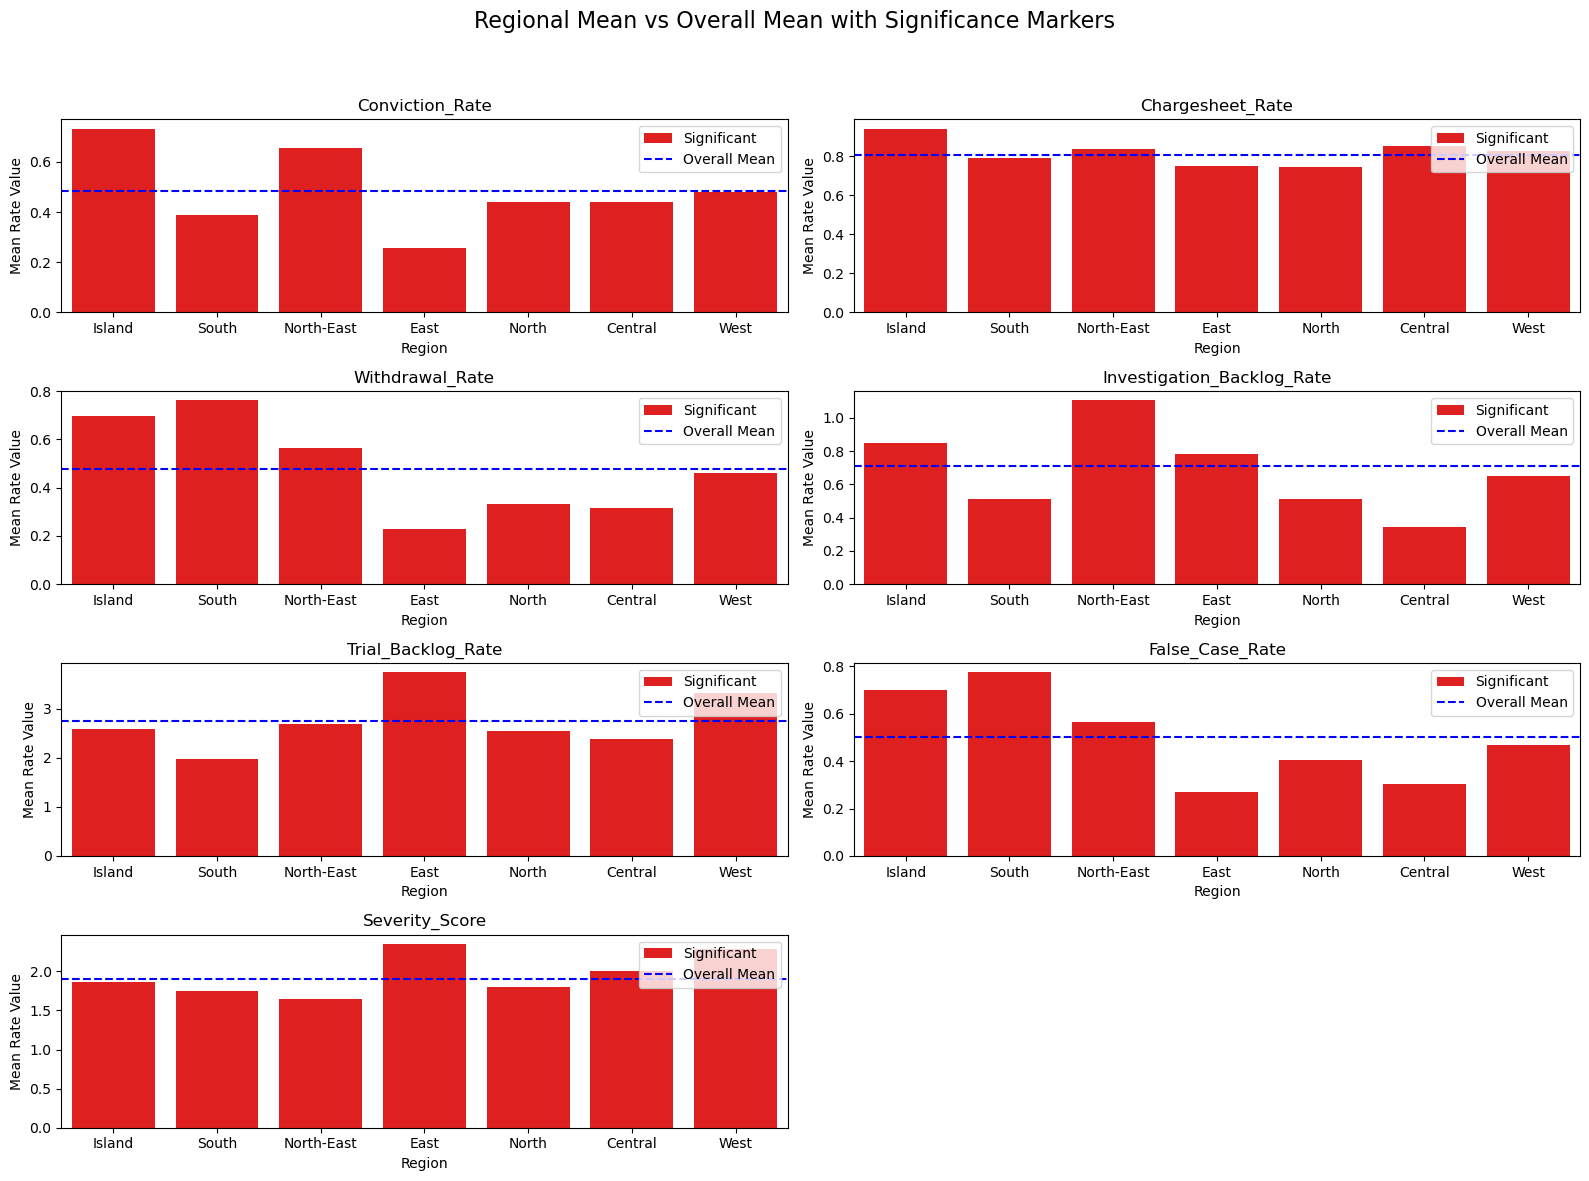

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
plot_df = comparison_df.copy()
plot_df['Significance'] = plot_df['Reject_H0'].apply(
    lambda x: 'Significant' if 'Reject' in x else 'Not Significant'
)

palette = {'Significant': 'red', 'Not Significant': 'gray'}
rates = plot_df['Rate'].unique()

# Set up 3x2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
axes = axes.flatten()

# Limit the number of plots to avoid IndexError
num_plots = min(len(rates), len(axes))

for i in range(num_plots):
    rate = rates[i]
    ax = axes[i]
    data = plot_df[plot_df['Rate'] == rate]
    
    # Bar plot with hue for significance
    sns.barplot(
        x='Region', y='Regional_Mean', hue='Significance',
        palette=palette, data=data, ax=ax, dodge=False
    )
    
    # Add overall mean horizontal line
    overall_mean = data['Overall_Mean'].iloc[0]
    ax.axhline(overall_mean, color='blue', linestyle='--', label='Overall Mean')
    
    # Customize subplot
    ax.set_title(rate)
    ax.set_xlabel('Region')
    ax.set_ylabel('Mean Rate Value')
    ax.legend(loc='upper right')

# Remove any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Regional Mean vs Overall Mean with Significance Markers', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()